In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
## Load the dataset and extract ______ as X and ______ as Y

X = traffic_df['snow_1h'] #Replace with X column
Y = traffic_df['traffic_volume'] #Replace with Y column

## Create A, the augmented data array

ones = np.ones(len(X))

A1 = np.vstack([ones,X]).T
#A1.shape

## Solve for w, the weight vector

w1 = np.linalg.lstsq(A1,Y, rcond=None)[0]
y_pred1 = np.matmul(A1, w1)

print("Model 1:")
print("(traffic volume) = %f  + %f * (snow in mm)" % (w1[0],w1[1]))

NameError: name 'traffic_df' is not defined

In [21]:
## Create A, the augmented data array

ones = np.ones(len(X))
squares = np.square(X)

A2 = np.vstack([ones, X, squares]).T

## Solve for w, the weight vector
w2 = np.linalg.lstsq(A2,Y, rcond=None)[0]
y_pred2 = np.matmul(A2, w2)

print("Model M2:")
print("(traffic Volume) = %f  + %f * (snow in mm) + %f * (snow in mm)^2" % (w2[0],w2[1],w2[2]))

Model M2:
(traffic Volume) = 3260.417644  + -4222.594957 * (snow in mm) + 11125.015665 * (snow in mm)^2


In [23]:
## Create a smooth set of X values for plotting the model
lineinput = np.linspace(0,100,1)     #replace with how we want to space out the information and the range
## Send the X values for plotting through the linear model
ones = np.ones(len(lineinput))
squares = np.square(lineinput)
A3 = np.vstack([ones, lineinput]).T
A4 = np.vstack([ones,lineinput,squares]).T

yplot1 = np.matmul(A3, w1)
yplot2 = np.matmul(A4, w2)

<function matplotlib.pyplot.show(*args, **kw)>

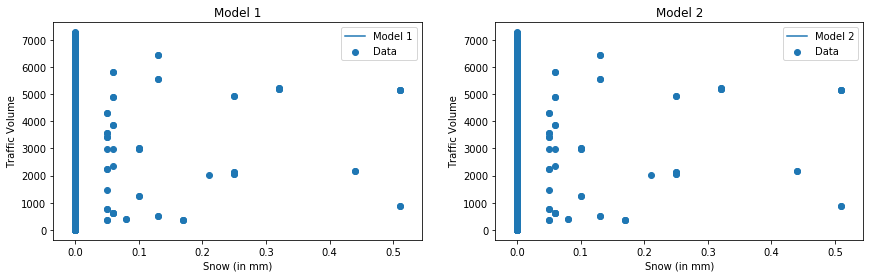

In [24]:
fig, axs = plt.subplots(1, 2)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None, hspace=None)

plt.subplot(1,2,1)
plt.scatter(X, Y, label = "Data")
plt.plot(lineinput, yplot1, label = "Model 1")
plt.ylabel('Traffic Volume') # fill in Y
plt.xlabel('Snow (in mm)') # fill in X
plt.title('Model 1')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X, Y, label = "Data")
plt.plot(lineinput, yplot2, label = "Model 2")
plt.ylabel('Traffic Volume')
plt.xlabel('Snow (in mm)')
plt.title('Model 2')
plt.legend()
plt.show # This lets you plot multiple inputs on the same graph

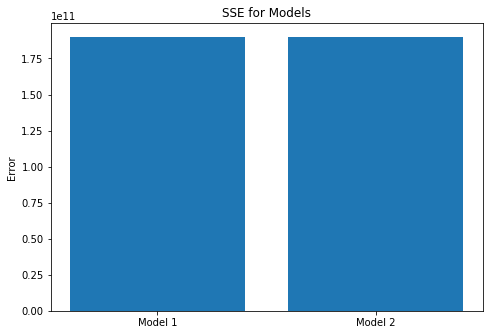

model1_SSE: 190228126514.20364 model2_SSE: 190220615141.40033


In [30]:
model1_SSE = sum((y_pred1 - Y)**2)
model2_SSE = sum((y_pred2 - Y)**2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Model 1', 'Model 2']
y = [model1_SSE, model2_SSE]
ax.bar(x,y)
plt.ylabel('Error')
plt.title('SSE for Models')
plt.show()
print('model1_SSE:', model1_SSE, 'model2_SSE:', model2_SSE)